<a href="https://colab.research.google.com/github/N4za/Geiser/blob/main/Geiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 5.1 Entrenamiento no supervisado

* **Nombre del alumno:** Nazareth Muñoz Ruiz 
* **Matrícula:** 1718110400
* **Grupo:** IDGS 91
* **Fecha de entrega:** 10/Diciembre/2021

# Problema
Se tiene un conjunto de datos de erupciones de géiseres, y se desea clasificar para su estudio.

Los datos que se tienen son:

* TimeEruption - Tiempo de erupción en minutos.
* TimeWaiting - Tiempo de espera para la siguiente erupción.

# Importar libreias 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans # Un cluster es un grupo, en donde se almacenaran los datos
from sklearn.preprocessing import StandardScaler

# Versiones

In [ ]:
print("Pandas {}".format(pd.__version__))
print("Numpy {}".format(np.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("SkLearn {}".format(sklearn.__version__))

Pandas 1.1.5
Numpy 1.19.5
Matplotlib 3.2.2
SkLearn 1.0.1


# Cragar el dataset

In [ ]:
df = pd.read_csv("geisers.csv")

# Información del DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [ ]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [ ]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


# Graficar el DataFrame

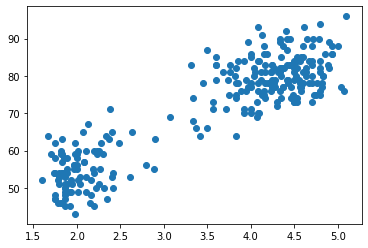

In [ ]:
plt.scatter(df['TimeEruption'], df['TimeWaiting'])
plt.show()

# Datos aleatorios

In [ ]:
TimeEruption = np.random.randint(100, size=100)
TimeWaiting = np.random.randint(100, size=100)

data = {
    'TimeEruption' : TimeEruption,
    'TimeWaiting' : TimeWaiting
}
df_s = pd.DataFrame(data)

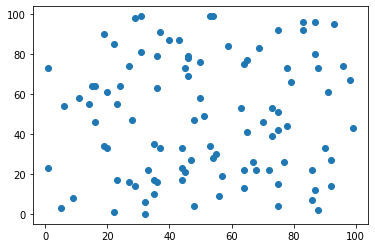

In [ ]:
plt.scatter(df_s['TimeEruption'], df_s['TimeWaiting'])
plt.show()

# Configurar el modelo

In [ ]:
model = KMeans(n_clusters=2, max_iter=100)

# Estandarizar los datos

In [ ]:
df = StandardScaler().fit_transform(df)

# Graficar valores estandarizados

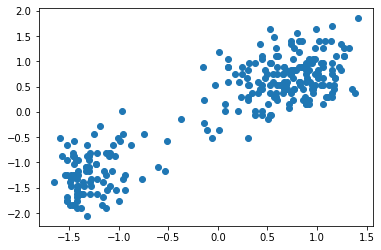

In [ ]:
plt.scatter(df[:,0], df[:,1]) # Ya no tenemos las columnas anteriores, ahora tenemos un arreglo por el preprocesamiento.
plt.show()

# Entrenamiento

In [ ]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

# Centroides 

In [ ]:
centroids = model.cluster_centers_
centroids

array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]])

# Ver las etiquetas

In [ ]:
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

# Graficar los centroides

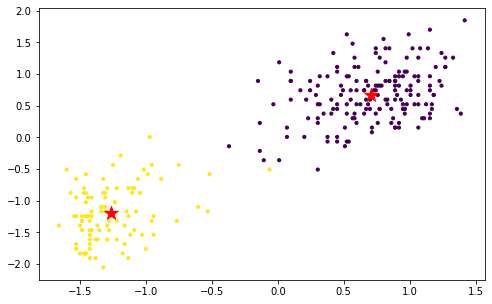

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df[:,0], df[:,1], c=model.labels_.astype(float), s=10, label='clusters')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='*', s=200, label="centroids")
plt.show()

# Predicciones

In [ ]:
new_label = model.predict([[0.5, -1.5]]) # Encontramos a que grupo pertenece un punto en estas coordenadas
new_label[0]

1

# Seleccionar el numero de clusters (Tecnica del codo)

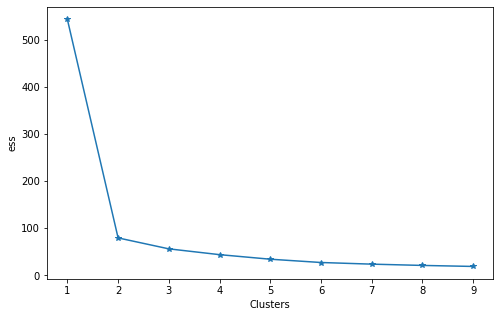

In [ ]:
ess = [] # Suma de la distancia al cuadrado
list_k = list(range(1,10))

for k in list_k:
    model = KMeans(n_clusters=k)
    model.fit(df)
    ess.append(model.inertia_) # Agrupar suma de las distancias 

plt.figure(figsize=(8,5))
plt.plot(list_k,ess,'-*')
plt.xlabel('Clusters')
plt.ylabel("ess")
plt.show() 
# Tecnica para cuando no sabemos en cuantos grupos dividir nuestro grupo de datos, cuando vemos que se aplana la curva tomamos como referencia ese numero; 2

# Graficar con distintos clusters

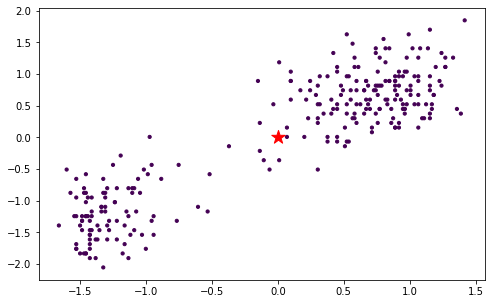

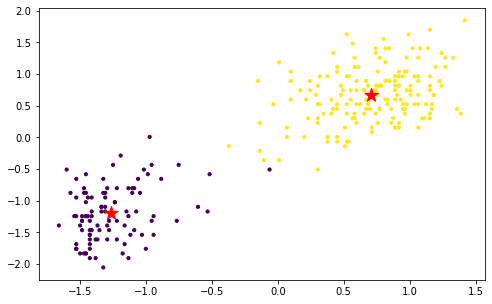

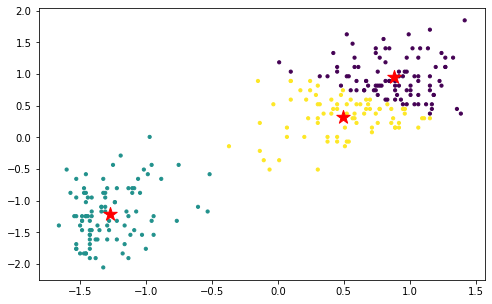

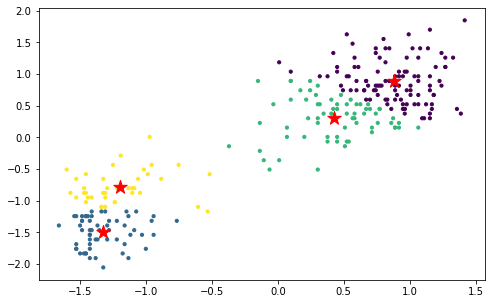

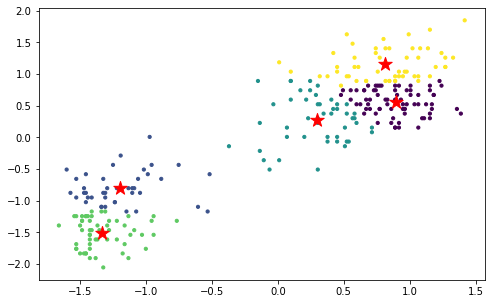

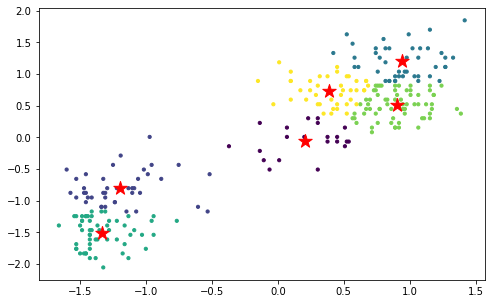

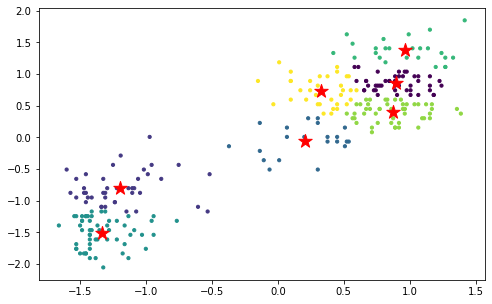

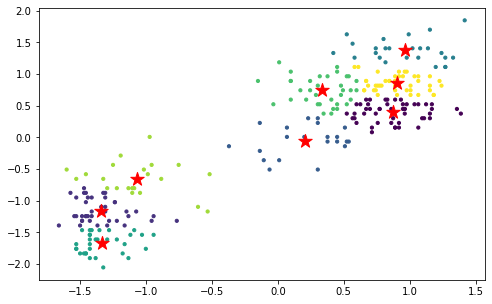

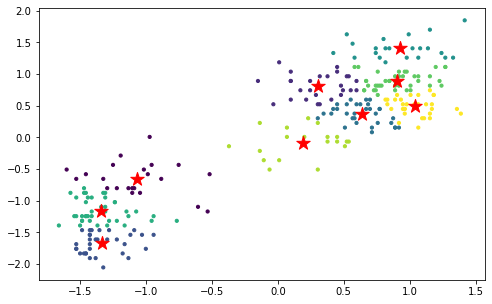

In [ ]:
list_k = list(range(1,10))

for k in list_k:
    model = KMeans(n_clusters=k)
    model.fit(df)
    centroids = model.cluster_centers_
    plt.figure(figsize=(8,5))
    plt.scatter(df[:,0], df[:,1], c=model.labels_.astype(float), s=10, label='clusters')
    plt.scatter(centroids[:,0], centroids[:,1], c="red", marker="*",s=200, label='centroids')
    plt.show() 